# <center> Module 6 Homework

<center>  Haotian Liang
    
<center> ISE-559

The code below imports the sqlite3 database package and creates a connection to the *sakila* database

In [50]:
import sqlite3
con = sqlite3.connect('sales_analytic_datamart.db')
cur = con.cursor()
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### <center> Read the Sales_Analytic_Datamart Table into a Pandas Dataframe 

In [51]:
data_table = cur.execute('''
   select *
   from datamart
''').fetchall()
datamart = pd.DataFrame(data_table)
datamart

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,1,2005-05-24,21,5,2005,2.99,80,BLANKET BEVERLY,Family,130,CHARLOTTE,HUNTER,CHARLOTTE.HUNTER@sakilacustomer.org,guas Lindas de Gois,Brazil,1,Lethbridge,Canada
1,2,2005-05-24,21,5,2005,2.99,333,FREAKY POCUS,Music,459,TOMMY,COLLAZO,TOMMY.COLLAZO@sakilacustomer.org,Qomsheh,Iran,2,Woodridge,Australia
2,3,2005-05-24,21,5,2005,3.99,373,GRADUATE LORD,Children,408,MANUEL,MURRELL,MANUEL.MURRELL@sakilacustomer.org,Jaffna,Sri Lanka,2,Woodridge,Australia
3,4,2005-05-24,21,5,2005,4.99,535,LOVE SUICIDES,Horror,333,ANDREW,PURDY,ANDREW.PURDY@sakilacustomer.org,Baku,Azerbaijan,1,Lethbridge,Canada
4,5,2005-05-24,21,5,2005,6.99,450,IDOLS SNATCHERS,Children,222,DELORES,HANSEN,DELORES.HANSEN@sakilacustomer.org,Jaroslavl,Russian Federation,2,Woodridge,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,16045,2005-08-23,34,8,2005,0.99,168,COMANCHEROS ENEMY,Children,14,BETTY,WHITE,BETTY.WHITE@sakilacustomer.org,Citrus Heights,United States,1,Lethbridge,Canada
16040,16046,2005-08-23,34,8,2005,0.99,951,VOYAGE LEGALLY,Classics,74,DENISE,KELLY,DENISE.KELLY@sakilacustomer.org,Rio Claro,Brazil,2,Woodridge,Australia
16041,16047,2005-08-23,34,8,2005,0.99,452,ILLUSION AMELIE,Foreign,114,GRACE,ELLIS,GRACE.ELLIS@sakilacustomer.org,Duisburg,Germany,2,Woodridge,Australia
16042,16048,2005-08-23,34,8,2005,8.99,439,HUNCHBACK IMPOSSIBLE,Drama,103,GLADYS,HAMILTON,GLADYS.HAMILTON@sakilacustomer.org,Ilorin,Nigeria,1,Lethbridge,Canada


### Read the Datamart Column Definitions

In [52]:
datamart_columns = cur.execute('''
PRAGMA table_info(datamart)
''').fetchall()
datamart_columns

[(0, 'rental_id', 'INT', 0, None, 1),
 (1, 'date', 'VARCHAR (12)', 0, None, 0),
 (2, 'week', 'INT', 0, None, 0),
 (3, 'month', 'INT', 0, None, 0),
 (4, 'year', 'INT', 0, None, 0),
 (5, 'amount', 'INT', 0, None, 0),
 (6, 'film_id', 'INT', 0, None, 0),
 (7, 'film_title', 'VARCHAR (255)', 0, None, 0),
 (8, 'film_category', 'VARCHAR (25)', 0, None, 0),
 (9, 'customer_id', 'INT', 0, None, 0),
 (10, 'customer_first_name', 'VARCHAR (45)', 0, None, 0),
 (11, 'customer_last_name', 'VARCHAR (45)', 0, None, 0),
 (12, 'customer_email', 'VARCHAR (50)', 0, None, 0),
 (13, 'customer_city', 'VARCHAR (50)', 0, None, 0),
 (14, 'customer_country', 'VARCHAR (50)', 0, None, 0),
 (15, 'store_id', 'INT', 0, None, 0),
 (16, 'store_city', 'VARCHAR (50)', 0, None, 0),
 (17, 'store_country', 'VARCHAR (50)', 0, None, 0)]

###  Read the Column Names into a Python List

In [53]:
col_names = []
for i in range(len(datamart_columns)):
    col_names.append(datamart_columns[i][1])
col_names

['rental_id',
 'date',
 'week',
 'month',
 'year',
 'amount',
 'film_id',
 'film_title',
 'film_category',
 'customer_id',
 'customer_first_name',
 'customer_last_name',
 'customer_email',
 'customer_city',
 'customer_country',
 'store_id',
 'store_city',
 'store_country']

### Assign the database table column names to be the dataframe column names

In [54]:
datamart.columns = col_names
datamart

,rental_id,date,week,month,year,amount,film_id,film_title,film_category,customer_id,customer_first_name,customer_last_name,customer_email,customer_city,customer_country,store_id,store_city,store_country
0,1,2005-05-24,21,5,2005,2.99,80,BLANKET BEVERLY,Family,130,CHARLOTTE,HUNTER,CHARLOTTE.HUNTER@sakilacustomer.org,guas Lindas de Gois,Brazil,1,Lethbridge,Canada
1,2,2005-05-24,21,5,2005,2.99,333,FREAKY POCUS,Music,459,TOMMY,COLLAZO,TOMMY.COLLAZO@sakilacustomer.org,Qomsheh,Iran,2,Woodridge,Australia
2,3,2005-05-24,21,5,2005,3.99,373,GRADUATE LORD,Children,408,MANUEL,MURRELL,MANUEL.MURRELL@sakilacustomer.org,Jaffna,Sri Lanka,2,Woodridge,Australia
3,4,2005-05-24,21,5,2005,4.99,535,LOVE SUICIDES,Horror,333,ANDREW,PURDY,ANDREW.PURDY@sakilacustomer.org,Baku,Azerbaijan,1,Lethbridge,Canada
4,5,2005-05-24,21,5,2005,6.99,450,IDOLS SNATCHERS,Children,222,DELORES,HANSEN,DELORES.HANSEN@sakilacustomer.org,Jaroslavl,Russian Federation,2,Woodridge,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,16045,2005-08-23,34,8,2005,0.99,168,COMANCHEROS ENEMY,Children,14,BETTY,WHITE,BETTY.WHITE@sakilacustomer.org,Citrus Heights,United States,1,Lethbridge,Canada
16040,16046,2005-08-23,34,8,2005,0.99,951,VOYAGE LEGALLY,Classics,74,DENISE,KELLY,DENISE.KELLY@sakilacustomer.org,Rio Claro,Brazil,2,Woodridge,Australia
16041,16047,2005-08-23,34,8,2005,0.99,452,ILLUSION AMELIE,Foreign,114,GRACE,ELLIS,GRACE.ELLIS@sakilacustomer.org,Duisburg,Germany,2,Woodridge,Australia
16042,16048,2005-08-23,34,8,2005,8.99,439,HUNCHBACK IMPOSSIBLE,Drama,103,GLADYS,HAMILTON,GLADYS.HAMILTON@sakilacustomer.org,Ilorin,Nigeria,1,Lethbridge,Canada


##  Basic profiling of the dataset

Write the Python command to return the total quantity of DVDs rented by category

In [55]:
datamart.groupby("film_category").size()

film_category
Action         1112
Animation      1166
Children        945
Classics        939
Comedy          941
Documentary    1050
Drama          1060
Family         1096
Foreign        1033
Games           969
Horror          846
Music           830
New             940
Sci-Fi         1101
Sports         1179
Travel          837
dtype: int64

Write the Python command to return the total sales by category

In [56]:
datamart.groupby("film_category")["amount"].sum()

film_category
Action         4375.85
Animation      4656.30
Children       3655.55
Classics       3639.59
Comedy         4383.58
Documentary    4217.52
Drama          4587.39
Family         4226.07
Foreign        4270.67
Games          4281.33
Horror         3722.54
Music          3417.72
New            4351.62
Sci-Fi         4756.98
Sports         5314.21
Travel         3549.64
Name: amount, dtype: float64

Write the Python command to return the total sales by month

In [57]:
datamart.groupby("month")["amount"].sum()

month
2      514.18
5     4823.44
6     9629.89
7    28368.91
8    24070.14
Name: amount, dtype: float64

## Data Preparation

1)  Display the datatypes of the various variables in the datamart

In [58]:
datamart.dtypes

rental_id                int64
date                    object
week                     int64
month                    int64
year                     int64
amount                 float64
film_id                  int64
film_title              object
film_category           object
customer_id              int64
customer_first_name     object
customer_last_name      object
customer_email          object
customer_city           object
customer_country        object
store_id                 int64
store_city              object
store_country           object
dtype: object

2)  Convert the film_category variable to be a Python category type

In [59]:
datamart['film_category'] = datamart['film_category'].astype('category')
datamart.dtypes

rental_id                 int64
date                     object
week                      int64
month                     int64
year                      int64
amount                  float64
film_id                   int64
film_title               object
film_category          category
customer_id               int64
customer_first_name      object
customer_last_name       object
customer_email           object
customer_city            object
customer_country         object
store_id                  int64
store_city               object
store_country            object
dtype: object

3)  Create a multiple rows per subject dataset consisting of customer_email, city, date, and amount

In [60]:
df=pd.DataFrame()

In [61]:
df['customer_email']=datamart['customer_email']
df['customer_city']=datamart['customer_city']
df['date']=datamart['date']
df['amount']=datamart['amount']
df

,customer_email,customer_city,date,amount
0,CHARLOTTE.HUNTER@sakilacustomer.org,guas Lindas de Gois,2005-05-24,2.99
1,TOMMY.COLLAZO@sakilacustomer.org,Qomsheh,2005-05-24,2.99
2,MANUEL.MURRELL@sakilacustomer.org,Jaffna,2005-05-24,3.99
3,ANDREW.PURDY@sakilacustomer.org,Baku,2005-05-24,4.99
4,DELORES.HANSEN@sakilacustomer.org,Jaroslavl,2005-05-24,6.99
...,...,...,...,...
16039,BETTY.WHITE@sakilacustomer.org,Citrus Heights,2005-08-23,0.99
16040,DENISE.KELLY@sakilacustomer.org,Rio Claro,2005-08-23,0.99
16041,GRACE.ELLIS@sakilacustomer.org,Duisburg,2005-08-23,0.99
16042,GLADYS.HAMILTON@sakilacustomer.org,Ilorin,2005-08-23,8.99


In [62]:
df.sort_values(['customer_email'])

,customer_email,customer_city,date,amount
10269,AARON.SELBY@sakilacustomer.org,Mwene-Ditu,2005-08-01,0.99
12117,AARON.SELBY@sakilacustomer.org,Mwene-Ditu,2005-08-17,9.99
2234,AARON.SELBY@sakilacustomer.org,Mwene-Ditu,2005-06-18,4.99
7852,AARON.SELBY@sakilacustomer.org,Mwene-Ditu,2005-07-28,4.99
10956,AARON.SELBY@sakilacustomer.org,Mwene-Ditu,2005-08-02,6.99
...,...,...,...,...
2373,ZACHARY.HITE@sakilacustomer.org,Akron,2005-06-18,2.99
6845,ZACHARY.HITE@sakilacustomer.org,Akron,2005-07-12,8.99
13969,ZACHARY.HITE@sakilacustomer.org,Akron,2005-08-20,2.99
6418,ZACHARY.HITE@sakilacustomer.org,Akron,2005-07-11,1.99


4)  Create a single row per subject datset consisting of customer_email and amount and aggregating it by sum.

In [41]:
df_1=pd.DataFrame()

In [42]:
df_1['customer_email']=datamart['customer_email']
df_1['amount']=datamart['amount']
df_1

,customer_email,amount
0,CHARLOTTE.HUNTER@sakilacustomer.org,2.99
1,TOMMY.COLLAZO@sakilacustomer.org,2.99
2,MANUEL.MURRELL@sakilacustomer.org,3.99
3,ANDREW.PURDY@sakilacustomer.org,4.99
4,DELORES.HANSEN@sakilacustomer.org,6.99
...,...,...
16039,BETTY.WHITE@sakilacustomer.org,0.99
16040,DENISE.KELLY@sakilacustomer.org,0.99
16041,GRACE.ELLIS@sakilacustomer.org,0.99
16042,GLADYS.HAMILTON@sakilacustomer.org,8.99


In [68]:
df_1 = df_1.groupby('customer_email')['amount'].agg('sum').to_frame()
df_1

,amount
customer_email,
AARON.SELBY@sakilacustomer.org,110.76
ADAM.GOOCH@sakilacustomer.org,101.78
ADRIAN.CLARY@sakilacustomer.org,74.81
AGNES.BISHOP@sakilacustomer.org,98.77
ALAN.KAHN@sakilacustomer.org,124.74
...,...
WILLIE.MARKHAM@sakilacustomer.org,101.75
WILMA.RICHARDS@sakilacustomer.org,91.80
YOLANDA.WEAVER@sakilacustomer.org,110.73


5)  Using this single row per subject dataset, create a histogram of "amount" using the "histopolot" command from the python seaborn graphics library (https://seaborn.pydata.org/generated/seaborn.histplot.html).  No special formatting is needed, just create the basic plot.

<AxesSubplot:xlabel='amount', ylabel='Count'>

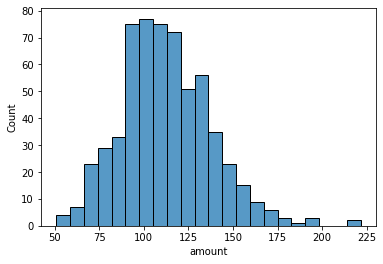

In [69]:
import seaborn as sns
sns.histplot(data=df_1["amount"])

6)  Display the number of rentals per week in the dataset

In [45]:
datamart.groupby("week")["amount"].size()

week
7      182
21     835
22     321
24    1705
25     606
27    2497
28     956
30    3256
31    1314
33    3148
34    1224
Name: amount, dtype: int64

7)  It appears that there are rentals in week 7 and then none until week 21.  Delete the rows for rentals that occurred in week 7.  Hint:  if you're not sure how to do this, Google something like "delete rows based on value using python/pandas"

In [47]:
datamart.drop(datamart.index[datamart['week'] == 7], inplace=True)

In [48]:
datamart

,rental_id,date,week,month,year,amount,film_id,film_title,film_category,customer_id,customer_first_name,customer_last_name,customer_email,customer_city,customer_country,store_id,store_city,store_country
0,1,2005-05-24,21,5,2005,2.99,80,BLANKET BEVERLY,Family,130,CHARLOTTE,HUNTER,CHARLOTTE.HUNTER@sakilacustomer.org,guas Lindas de Gois,Brazil,1,Lethbridge,Canada
1,2,2005-05-24,21,5,2005,2.99,333,FREAKY POCUS,Music,459,TOMMY,COLLAZO,TOMMY.COLLAZO@sakilacustomer.org,Qomsheh,Iran,2,Woodridge,Australia
2,3,2005-05-24,21,5,2005,3.99,373,GRADUATE LORD,Children,408,MANUEL,MURRELL,MANUEL.MURRELL@sakilacustomer.org,Jaffna,Sri Lanka,2,Woodridge,Australia
3,4,2005-05-24,21,5,2005,4.99,535,LOVE SUICIDES,Horror,333,ANDREW,PURDY,ANDREW.PURDY@sakilacustomer.org,Baku,Azerbaijan,1,Lethbridge,Canada
4,5,2005-05-24,21,5,2005,6.99,450,IDOLS SNATCHERS,Children,222,DELORES,HANSEN,DELORES.HANSEN@sakilacustomer.org,Jaroslavl,Russian Federation,2,Woodridge,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16039,16045,2005-08-23,34,8,2005,0.99,168,COMANCHEROS ENEMY,Children,14,BETTY,WHITE,BETTY.WHITE@sakilacustomer.org,Citrus Heights,United States,1,Lethbridge,Canada
16040,16046,2005-08-23,34,8,2005,0.99,951,VOYAGE LEGALLY,Classics,74,DENISE,KELLY,DENISE.KELLY@sakilacustomer.org,Rio Claro,Brazil,2,Woodridge,Australia
16041,16047,2005-08-23,34,8,2005,0.99,452,ILLUSION AMELIE,Foreign,114,GRACE,ELLIS,GRACE.ELLIS@sakilacustomer.org,Duisburg,Germany,2,Woodridge,Australia
16042,16048,2005-08-23,34,8,2005,8.99,439,HUNCHBACK IMPOSSIBLE,Drama,103,GLADYS,HAMILTON,GLADYS.HAMILTON@sakilacustomer.org,Ilorin,Nigeria,1,Lethbridge,Canada


In [49]:
datamart.groupby("week")["amount"].size()

week
21     835
22     321
24    1705
25     606
27    2497
28     956
30    3256
31    1314
33    3148
34    1224
Name: amount, dtype: int64